# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [2]:
import pandas as pd

data = pd.read_excel('alldata.xlsx')

print(data.head())

   530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   

   11a  11b  12a  12b               storkreds  alder  
0   -2    1    1    1    Københavns Storkreds     78  
1    1   -2    0    0          Fyns Storkreds     64  
2    0   -1    1   -2     Bornholms Storkreds     37  
3    2   -1    2    0  Nordjyllands Storkreds     28  
4   -2    0    2   -2    Københavns Storkreds     58  

[5 rows x 53 columns]


In [3]:
average_age = data.groupby('parti')['alder'].mean().sort_values(ascending=False)
print(average_age)

parti
Danmarksdemokraterne                           51.216216
Kristendemokraterne                            49.023810
Løsgænger                                      48.000000
Nye Borgerlige                                 47.568627
Venstre                                        46.678571
Alternativet                                   46.000000
Dansk Folkeparti                               45.530612
Radikale Venstre                               44.955224
Socialdemokratiet                              44.344828
Moderaterne                                    44.261905
Det Konservative Folkeparti                    42.897959
Socialistisk Folkeparti                        40.928571
Enhedslisten                                   40.513514
Liberal Alliance                               36.885714
Frie Grønne, Danmarks Nye Venstrefløjsparti    34.807692
Name: alder, dtype: float64


In [4]:
data_questions = data.drop(['alder', 'storkreds', 'parti'], axis=1)

answered_with_2_or_minus_2 = data_questions.groupby('navn').apply(lambda x: (x == 2) | (x == -2)).sum(axis=1)

print(answered_with_2_or_minus_2.reset_index(level=1, drop=True).sort_values(ascending=False).head(10))

navn
Søren Vanting          49
Sarah Nørris           49
Kim Andkjær Doberck    44
Rashid Ali             43
Mohamed Abdikarim      43
Frank Sørensen         42
Elise Bjerkrheim       42
Lone Vase Langballe    42
John Bjerg             42
Jan Filbært            42
dtype: int64


We are making dictionaries for each subject, that we want to compare the candidates in.

The dictionary consists of a key, that is the id of the question. And a value that is a boolean that dictates if answering "2" to the question is progressive or conservative.

E.g.: "Den økonomiske ulighed i det danske samfund bør mindskes?"
- "2": "Ulighed skal mindskes" (progressive)
- "-2": "Ulighed skal øges/ikke ændres" (conservative)

In [5]:

economy_questions = {
    "name": "Economy",
    "questions": {
    '4a': True,
    '4b': True,
    '541': True,
    '531': True,
    '537': False,
  }
}

immigration_questions = {
    "name": "Immigration",
    "questions": {
  '6a': True,
  '6b': False,
  '555': False,
  '551': False,
  }
}

social_questions = {
    "name": "Social",
    "questions": {
  '10a': False,
  '10b': True,
  '544': True,
  '538': True,
  '550': True,
  '553': False,
  }
}

welfare_questions = {
    "name": "Welfare",
    "questions": {
  '9a': False,
  '557': True,
  '548': True,
  '543': False,
  '545': True,
  }
}

climate_questions = {
    "name": "Climate",
    "questions": {
  '559': True,
  '546': False,
  '530': True,
  '1a': True,
  '1b': True,
  '7a': False,
  '7b': False,
  }
}

In [6]:
# Make a list of all objects
question_subjects = [economy_questions, immigration_questions, social_questions, welfare_questions, climate_questions]

CandidateOpinions = {}

# Initialize CandidateOpinions for each person
for index, row in data.iterrows():
    CandidateOpinions[row['navn']] = {
        'parti': row['parti'],
        'subjects': {}
    }
    for subject in question_subjects:
        CandidateOpinions[row['navn']]['subjects'][subject["name"]] = 0  # Initialize each subject score to 0

# Assuming data_questions is a dictionary containing questions and values
for index, row in data.iterrows():
    for subject in question_subjects:
        for question, value in subject["questions"].items():  # Use items() to iterate over keys and values
            CandidateOpinions[row['navn']]['subjects'][subject["name"]] += data.get(question, 0)[index] if value else -data.get(question, 0)[index]


# Now we have a value for each subject for each person
print(CandidateOpinions['Mette Abildgaard'])



{'parti': 'Det Konservative Folkeparti', 'subjects': {'Economy': -3, 'Immigration': -1, 'Social': -8, 'Welfare': -4, 'Climate': -1}}


In [7]:
PartyOpinions = {}

# Initialize PartyOpinions for each party
for party in data['parti'].unique():
    PartyOpinions[party] = {}
    for subject in question_subjects:
        PartyOpinions[party][subject["name"]] = 0  # Initialize each subject score to 0


for candidate in CandidateOpinions:
    for subject in question_subjects:
        PartyOpinions[CandidateOpinions[candidate]['parti']][subject["name"]] += CandidateOpinions[candidate]['subjects'][subject["name"]]

party_sizes = data['parti'].value_counts()

for party in PartyOpinions:
    for subject in question_subjects:
        PartyOpinions[party][subject["name"]] /= party_sizes[party]

print(PartyOpinions)


{'Moderaterne': {'Economy': 0.35714285714285715, 'Immigration': 3.261904761904762, 'Social': -2.761904761904762, 'Welfare': 0.7619047619047619, 'Climate': -2.119047619047619}, 'Socialistisk Folkeparti': {'Economy': 8.485714285714286, 'Immigration': 6.328571428571428, 'Social': 5.371428571428571, 'Welfare': 6.085714285714285, 'Climate': 7.614285714285714}, 'Alternativet': {'Economy': 6.373134328358209, 'Immigration': 6.985074626865671, 'Social': 3.4029850746268657, 'Welfare': 5.029850746268656, 'Climate': 9.0}, 'Løsgænger': {'Economy': 1.6666666666666667, 'Immigration': 2.0, 'Social': -2.6666666666666665, 'Welfare': 0.6666666666666666, 'Climate': -5.0}, 'Enhedslisten': {'Economy': 8.81081081081081, 'Immigration': 7.581081081081081, 'Social': 6.297297297297297, 'Welfare': 5.72972972972973, 'Climate': 9.864864864864865}, 'Danmarksdemokraterne': {'Economy': -2.27027027027027, 'Immigration': -7.297297297297297, 'Social': -5.621621621621622, 'Welfare': -0.8378378378378378, 'Climate': -4.5135

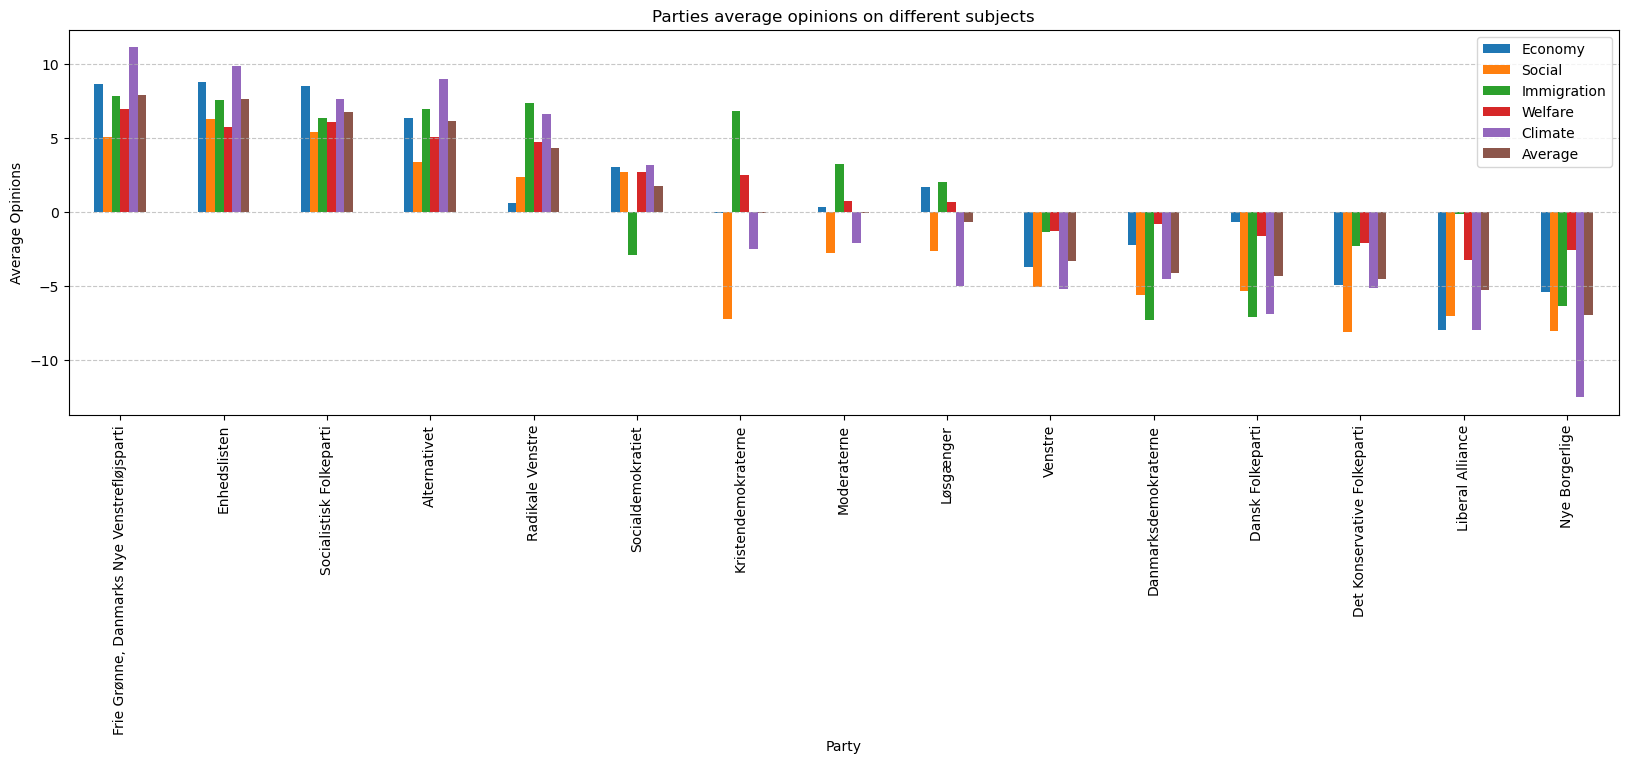

In [8]:
party_data = {
    "Names": list(PartyOpinions.keys()),
    "Economy": [PartyOpinions[party]["Economy"] for party in PartyOpinions],
    "Social": [PartyOpinions[party]["Social"] for party in PartyOpinions],
    "Immigration": [PartyOpinions[party]["Immigration"] for party in PartyOpinions],
    "Welfare": [PartyOpinions[party]["Welfare"] for party in PartyOpinions],
    "Climate": [PartyOpinions[party]["Climate"] for party in PartyOpinions] 
}



df = pd.DataFrame(party_data)

# Calculate the average score for each party
df['Average'] = df.copy().drop('Names', axis=1).mean(axis=1)

# Sort the DataFrame by the 'Average' column in descending order
df_sorted = df.sort_values(by='Average', ascending=False)

df_sorted.set_index('Names', inplace=True)

# Plot the data using pandas plot() method
ax = df_sorted.plot(kind='bar', figsize=(20, 5))

# Add labels and title
ax.set_xlabel('Party')
ax.set_ylabel('Average Opinions')
ax.set_title('Parties average opinions on different subjects')
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

## So what do we see? 

We have ordered the parties in the order of most extreme left to most extreme right. To see which parties are the most extreme, and which are the most moderate.


#Insert Inter party differences here

1. Beregn den gennemsnittelige uenighed i hvert parti, sammenlign dem med hinanden for at finde det mest "splittede" parti. 
2. Ved at lave noget boxplot så har vi mulighed for at se om ét parti's extremer værdier passer med gennemsnittelige værdier for at andet parti. 

# Model training

# SVM

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Without age
X = data.copy().drop(['parti', 'alder', 'storkreds', 'navn'], axis=1)
y = data['parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   stratify=y, 
                                                   random_state=42)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.91


In [11]:
# With age, no scaling
X = data.copy().drop(['parti', 'storkreds', 'navn'], axis=1)
y = data['parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   stratify=y, 
                                                   random_state=42)
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.71
Accuracy on test set: 0.70


In [12]:
# Age with scaling
X = data.copy().drop(['parti', 'storkreds', 'navn'], axis=1)
y = data['parti']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   stratify=y, 
                                                   random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.91


# Optimizing

Now we will try to optimize the models using GridSearchCV. 

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

model = SVC(random_state=42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Results
print("Best Score: ", grid_search.best_score_, "Best parameters:", grid_search.best_params_, )
mean = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

for mean, param in zip(mean, params):
    print(mean, param)

/Users/reinhardt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.9076923076923077 Best parameters: {'C': 1, 'gamma': 0.1}
0.1123076923076923 {'C': 0.001, 'gamma': 0.001}
0.1123076923076923 {'C': 0.001, 'gamma': 0.01}
0.1123076923076923 {'C': 0.001, 'gamma': 0.1}
0.1123076923076923 {'C': 0.001, 'gamma': 1}
0.1123076923076923 {'C': 0.001, 'gamma': 10}
0.1123076923076923 {'C': 0.001, 'gamma': 100}
0.1123076923076923 {'C': 0.01, 'gamma': 0.001}
0.1123076923076923 {'C': 0.01, 'gamma': 0.01}
0.1123076923076923 {'C': 0.01, 'gamma': 0.1}
0.1123076923076923 {'C': 0.01, 'gamma': 1}
0.1123076923076923 {'C': 0.01, 'gamma': 10}
0.1123076923076923 {'C': 0.01, 'gamma': 100}
0.1123076923076923 {'C': 0.1, 'gamma': 0.001}
0.1707692307692308 {'C': 0.1, 'gamma': 0.01}
0.5753846153846154 {'C': 0.1, 'gamma': 0.1}
0.12 {'C': 0.1, 'gamma': 1}
0.1123076923076923 {'C': 0.1, 'gamma': 10}
0.1123076923076923 {'C': 0.1, 'gamma': 100}
0.16153846153846155 {'C': 1, 'gamma': 0.001}
0.8169230769230769 {'C': 1, 'gamma': 0.01}
0.9076923076923077 {'C': 1, 'gamma': 0.1}
0.

In [14]:
# Testing with test data from most optimal hyper parameters

svm_test_result = grid_search.best_estimator_.score(X_test_scaled, y_test)
print("Accuracy on testing set: {}".format(svm_test_result))


Accuracy on testing set: 0.9216589861751152


# SVM Conclusion

We found out that using the parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} we get the best results.
Including the ages and scaling them. 

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
model = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], # We will try different numbers of neighbors
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Results
print("Best Score: ", grid_search.best_score_, "Best parameters:", grid_search.best_params_, )
mean = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, param in zip(mean, params):
    print(mean, param)

/Users/reinhardt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.8769230769230768 Best parameters: {'n_neighbors': 11}
0.8523076923076923 {'n_neighbors': 1}
0.8646153846153846 {'n_neighbors': 3}
0.8723076923076925 {'n_neighbors': 5}
0.8738461538461539 {'n_neighbors': 7}
0.8723076923076922 {'n_neighbors': 9}
0.8769230769230768 {'n_neighbors': 11}
0.8707692307692309 {'n_neighbors': 13}
0.8676923076923078 {'n_neighbors': 15}
0.8723076923076925 {'n_neighbors': 17}
0.8676923076923077 {'n_neighbors': 19}
0.8646153846153846 {'n_neighbors': 21}
0.8615384615384617 {'n_neighbors': 23}
0.86 {'n_neighbors': 25}
0.8553846153846154 {'n_neighbors': 27}
0.8507692307692307 {'n_neighbors': 29}


From here we can see that 11 neighbors seems to be the best choice. 

In [17]:
print("Accuracy on training set: {}".format(grid_search.best_estimator_.score(X_train_scaled, y_train)))
print("Accuracy on testing set: {}".format(grid_search.best_estimator_.score(X_test_scaled, y_test)))

Accuracy on training set: 0.9046153846153846
Accuracy on testing set: 0.8940092165898618


# Tree-based models

We do not use the scaled dataset, because decision trees are generally not sensitive to the scale of features.

## Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Results
print("Best Score: ", grid_search.best_score_, "Best parameters:", grid_search.best_params_, )
mean = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, param in zip(mean, params):
    print(mean, param)

/Users/reinhardt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.9046153846153846 Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
0.883076923076923 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.8953846153846154 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8953846153846154 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.8830769230769231 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
0.8969230769230769 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.8846153846153845 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
0.889230769230769 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
0.8815384615384614 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.8923076923

We can now determine that the best hyperparameters are: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}.
We might want to limit max_depth in the future to improve the perfomance of the model.

In [19]:
print("Accuracy on training set: {}".format(grid_search.best_estimator_.score(X_train, y_train)))
print("Accuracy on testing set: {}".format(grid_search.best_estimator_.score(X_test, y_test)))

Accuracy on training set: 0.9984615384615385
Accuracy on testing set: 0.9078341013824884


## Descision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Results
print("Best Score: ", grid_search.best_score_, "Best parameters:", grid_search.best_params_, )
mean = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
for mean, param in zip(mean, params):
    print(mean, param)

/Users/reinhardt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Score:  0.7292307692307693 Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.7046153846153846 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7153846153846153 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.7092307692307692 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.7015384615384616 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.7138461538461538 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.7092307692307693 {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.7169230769230769 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.716923076923077 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.7230769230769232 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.6692307692307693 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.6630769230769231 {'max_d

In [21]:
print("Accuracy on training set: {}".format(grid_search.best_estimator_.score(X_train, y_train)))
print("Accuracy on testing set: {}".format(grid_search.best_estimator_.score(X_test, y_test)))

Accuracy on training set: 0.8661538461538462
Accuracy on testing set: 0.7926267281105991


There is a big gap between the training and the test score, which indicates that the model is overfitting. In addition the score is not very high, compared to the other models.

But lets visualize the tree and see what the best predictors are.

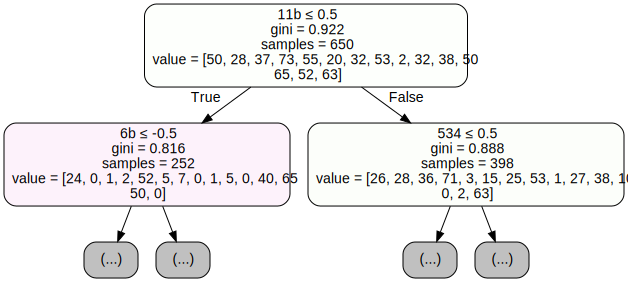

In [38]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(grid_search.best_estimator_, out_file=None,
              feature_names=X.columns, filled=True, rounded=True,
              special_characters=True, max_depth=1)

graph = graphviz.Source(dot_data)
graph

The best predictor was question **11b**, which is the following:
> **11b:** *Det bør undersøges, om Mette Frederiksen kan stilles for en rigsret som konsekvens af hendes håndtering af Mink-sagen.*

Which is a question about the Mink-saga, which was a big scandal in Denmark.

Interestingly this is not about one of the big subjects in politics (economy, immigration, climate etc.), but about a specific event.

The second best predictors was question **6b** and **534**.
> **6b:** *Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda.*

> **534:** *På sigt skal Danmark meldes ud af EU*

These questions are very political in comparison to **11b**, and discusses immigration and foreign policy.